# HMM Visualizations

import os
import numpy as np
from IPython.display import HTML

from processing import readshakes
from HMM2 import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## Visualization of the dataset

First, we visualize the entirety of the Shakespearean sonnets as a wordcloud:

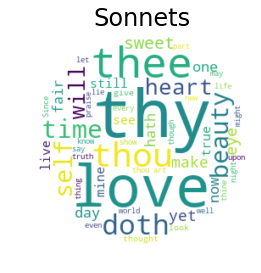

In [51]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Sonnets')
obs, obs_map = parse_observations(text)

## Training an HMM

Now we train an HMM on our dataset. We use 10 hidden states and train over 100 iterations:

In [37]:
(ps, pns, wtn, ntw) = readshakes()
hmm8 = unsupervised_HMM(ps, 10, 100)

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100


## Part G: Visualization of the sparsities of A and O

We can visualize the sparsities of the A and O matrices by treating the matrix entries as intensity values and showing them as images. 

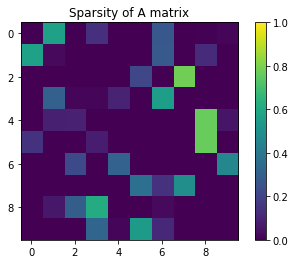

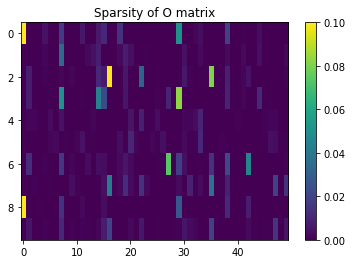

In [39]:
visualize_sparsities(hmm8, O_max_cols=50)

## Generating a sample sentence

We'll generate a sample sentence from these texts.

In [41]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm8, wtn, n_words=25))

Sample Sentence:
Because character can crave eager princes is worship faculty good self breathers nothing eisel of his equipage 
 well summer's look 
 looked worst oft...


## Part H: Using varying numbers of hidden states

Using different numbers of hidden states can lead to different behaviours in the HMMs. Below, we train several HMMs with 1, 2, 4, and 16 hidden states, respectively. What do you notice about their emissions? How do these emissions compare to the emission above?

In [42]:
hmm1 = unsupervised_HMM(ps, 1, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm1, wtn, n_words=25))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
Thine show 
 on with from to patience 
 love would murd'rous but age thy and and 
 the him might her haply damasked the...


In [43]:
hmm2 = unsupervised_HMM(ps, 2, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm2, wtn, n_words=25))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
World gravity stand where are the stops of die envy gilded from said 
 than in self's desiring self constancy loved all foul sing affairs...


In [44]:
hmm4 = unsupervised_HMM(ps,4, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm4, wtn, n_words=25))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
But will that up 
 and grows 
 light a that hast painting what beggared answer do dear when thy 
 youth's and 
 the...


In [45]:
hmm16 = unsupervised_HMM(ps, 16, 100)
print('\nSample Sentence:\n====================')
print(sample_sentence(hmm16, wtn, n_words=25))

Iteration: 10
Iteration: 20
Iteration: 30
Iteration: 40
Iteration: 50
Iteration: 60
Iteration: 70
Iteration: 80
Iteration: 90
Iteration: 100

Sample Sentence:
You invention compare with my pleasure 
 and call appetite gave sway'st though sweet not in your grave 
 that pays the bliss to thee...


## Part I: Visualizing the wordcloud of each state

Below, we visualize each state as a wordcloud by sampling a large emission from the state:

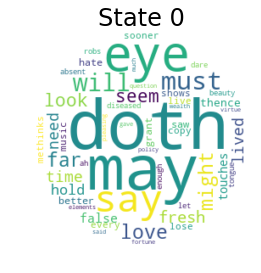

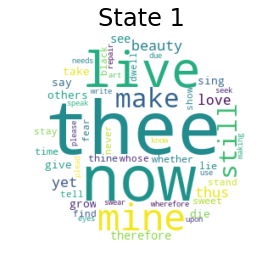

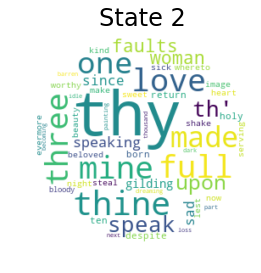

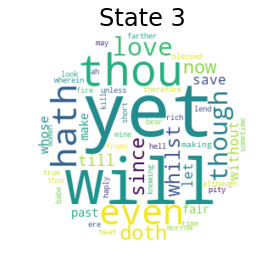

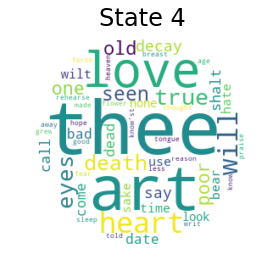

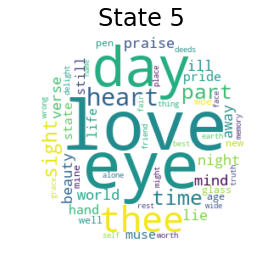

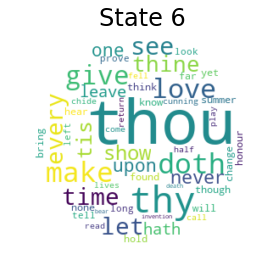

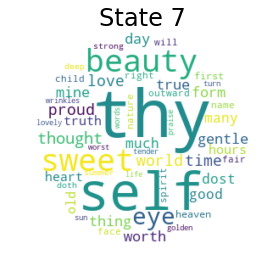

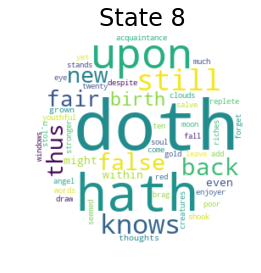

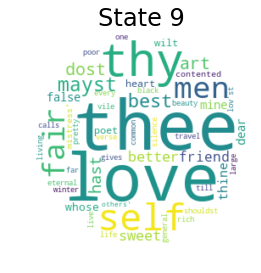

In [47]:
wordclouds = states_to_wordclouds(hmm8, wtn)

## Visualizing the process of an HMM generating an emission

The visualization below shows how an HMM generates an emission. Each state is shown as a wordcloud on the plot, and transition probabilities between the states are shown as arrows. The darker an arrow, the higher the transition probability.

At every frame, a transition is taken and an observation is emitted from the new state. A red arrow indicates that the transition was just taken. If a transition stays at the same state, it is represented as an arrowhead on top of that state.

Use fullscreen for a better view of the process.


Animating...


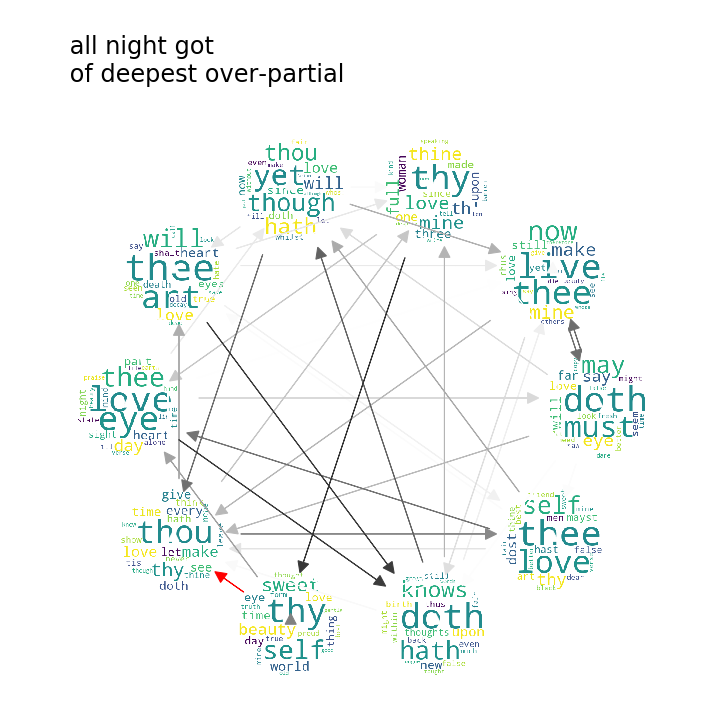

In [49]:
anim = animate_emission(hmm8, wtn, M=8)
HTML(anim.to_html5_video())